# AERQ Profit & Loss
 

## ToDos
- [ ] skip empty lines while reading excel (for instance: secureguard sheet)

In [1]:
import pandas as pd
import numpy as np 
#read the several sheets from base excel file
df_tickets = pd.read_excel('./test.xlsx', sheet_name='Tickets', header=2)
df_procon = pd.read_excel('./test.xlsx', sheet_name='Procon LTE Data')
df_secureguard = pd.read_excel('./test.xlsx', sheet_name='SecureGuard')

In [2]:
#some general variables and value preparations

#create categorical object which helps to order DataFrames by month later on
df_tickets['Billing cycle'] = pd.Categorical(df_tickets['Billing cycle'], categories=["Januar", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
df_secureguard['Month'] = pd.Categorical(df_secureguard['Month'], categories=["Januar", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)

#the rate LSY pays to SG
sg_rate = 127
#the rate LSY pays for internal employees
lsy_rate = 60

## Process and plot ticket related data (so, the "Income")


### Ticket-based income per month (Budget = Letter Agreement)

In [5]:
#show the monthly income using the 'groupby' function and then apply sum() as an aggregation
#group by billing cycle (thus, month) and year, then create sum on column 'Price billed' and sort by month ascending
df_t2020 = df_tickets.groupby(by=['Billing cycle', 'Year'])[['Price billed']].sum().sort_values(by=['Billing cycle'])
df_t2020

Price billed
Billing cycle Year                
Januar        2020.0         0.000
              2021.0         0.000
February      2020.0         0.000
              2021.0         0.000
March         2020.0         0.000
              2021.0         0.000
April         2020.0      1146.565
              2021.0         0.000
May           2020.0      5074.220
              2021.0         0.000
June          2021.0         0.000
              2020.0      4466.030
July          2020.0     31543.924
              2021.0         0.000
August        2020.0     29939.600
              2021.0         0.000
September     2020.0      7166.510
              2021.0         0.000
October       2020.0     28339.670
              2021.0         0.000
November      2020.0    146268.065
              2021.0         0.000
December      2020.0     19484.540
              2021.0         0.000

<AxesSubplot:xlabel='Billing cycle,Year'>

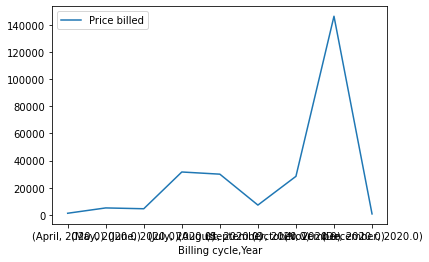

In [6]:
df_t2020.plot()

## Process and plot expenses 



### Expenses for SecureGuard in 2020


In [3]:
#group by month and year, then create sum on column 'Hours booked' and sort by month ascending
df_sg2020 = df_secureguard.groupby(by=['Month', 'Year'])[['Hours booked']].sum().sort_values(by=['Month'])
#calculate the price, derived from the 'Hours booked' and the current SG rate
df_sg2020 = df_sg2020 * sg_rate
#rename the column in the DataFrame, so that it makes sense again
df_sg2020 = df_sg2020.rename(columns = {'Hours booked': 'Kosten €'})
#print out the DF
df_sg2020

,,Kosten €
Month,Year,
Januar,2020,NaN
February,2020,NaN
March,2020,NaN
April,2020,NaN
May,2020,NaN
June,2020,508.00
July,2020,5397.50
August,2020,9461.50
September,2020,26352.50


In [5]:
df_sg2020.groupby(by='Year')[['Kosten €']].sum()

,Kosten €
Year,
2020,122015.25


<AxesSubplot:xlabel='Month,Year'>

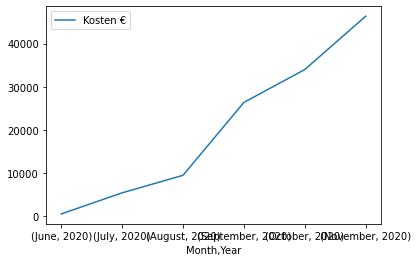

In [4]:
df_sg2020.plot()